In [1]:
import sys
from pathlib import Path
src_utils_path = Path("../../src/utils")
sys.path.append(str(src_utils_path))
import metrics as mjo
import yaml  

import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

import numpy as np
import xarray as xr 
import re

In [2]:
lat_range = 10
lead = 35
memory_last = 95
exp_num = 10
bcc_list = []
bcc_res_list = []

rmse_list = []
rmse_res_list = []

for window_len in [5,11,15,21,25,31]:
    for residual in ['False','True']:
        with open(f'./yaml/best_config_sm{window_len}_res{residual}.yaml', 'r') as file:
            config = yaml.safe_load(file)

        output_path = config['prediction_save_path']
        fn_list = []

        for exp_num in range(1, exp_num+1):
            fn = re.sub(r"exp\d+/", f"exp{exp_num}/", output_path)
            fn_list.append(fn)

        bcc, rmse = mjo.get_skill_all_leads_ensemble_mean(
            fn_list=fn_list,
            datesta='2016-01-01',
            dateend='2021-12-31',
            leadmjo=lead,
            Fnmjo=config["data"]["target_path"]
        )
        if residual == 'True':
            bcc_res_list.append(bcc)
            rmse_res_list.append(rmse)
        else:
            bcc_list.append(bcc)
            rmse_list.append(rmse)

bcc_list = np.asarray(bcc_list)
bcc_res_list = np.asarray(bcc_res_list)
rmse_list = np.asarray(rmse_list)
rmse_res_list = np.asarray(rmse_res_list)


In [3]:
lat_range = 10
lead = 35
memory_last = 95
exp_num = 10
bccs_list = []
bccs_res_list = []
rmses_list = []
rmses_res_list = []

for window_len in [5,11,15,21,25,31]:
    for residual in ['False','True']:
        with open(f'./yaml/best_config_sm{window_len}_res{residual}.yaml', 'r') as file:
            config = yaml.safe_load(file)

        output_path = config['prediction_save_path']
        fn_list = []

        for exp_num in range(1, exp_num+1):
            fn = re.sub(r"exp\d+/", f"exp{exp_num}/", output_path)
            fn_list.append(fn)

        bccs, rmses = mjo.get_skill_all_leads_parallel('ROMI', datesta='2016-01-01', dateend='2021-12-31', fn_list=fn_list, lead_max=lead, exp_list=np.arange(1,11), Fnmjo=config["data"]["target_path"])

        if residual == 'True':
            bccs_res_list.append(bccs)
            rmses_res_list.append(rmses)
        else:
            bccs_list.append(bccs)
            rmses_list.append(rmses)



In [4]:
bccs_list_arr = np.zeros((6,10,36))
bccs_res_list_arr = np.zeros((6,10,36))
rmses_list_arr = np.zeros((6,10,36))
rmses_res_list_arr = np.zeros((6,10,36))

for i in range(6):
    for j in np.arange(1,11):
        bccs_list_arr[i,j-1] = np.copy(np.asarray(bccs_list[i][j]))
        bccs_res_list_arr[i,j-1] = np.copy(np.asarray(bccs_res_list[i][j]))
        rmses_list_arr[i,j-1] = np.copy(np.asarray(rmses_list[i][j]))
        rmses_res_list_arr[i,j-1] = np.copy(np.asarray(rmses_res_list[i][j]))   
bccs_list_arr = np.asarray(bccs_list_arr)
bccs_res_list_arr = np.asarray(bccs_res_list_arr)
rmses_list_arr = np.asarray(rmses_list_arr)
rmses_res_list_arr = np.asarray(rmses_res_list_arr)

In [5]:
np.save('bccs_list_arr.npy',bccs_list_arr)
np.save('bccs_res_list_arr.npy',bccs_res_list_arr)
np.save('rmses_list_arr.npy',rmses_list_arr)
np.save('rmses_res_list_arr.npy',rmses_res_list_arr)


In [3]:
rmses_list_arr = np.load('rmses_list_arr.npy')
rmses_res_list_arr = np.load('rmses_res_list_arr.npy')


/tmp/ipykernel_2188542/1978947229.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('RdBu')


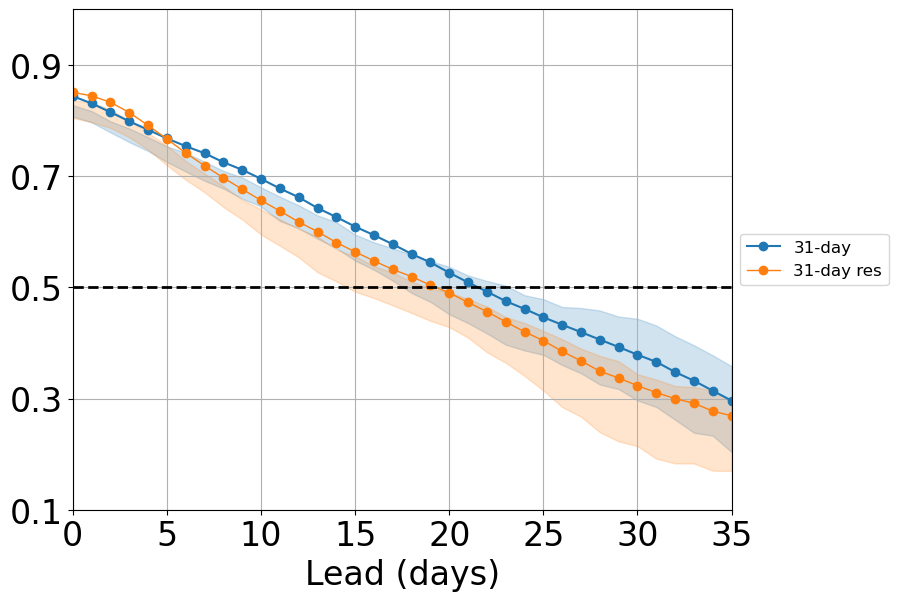

In [94]:
import matplotlib.cm as cm
cmap = cm.get_cmap('RdBu')
norm = plt.Normalize(vmin=3, vmax=31)

plt.rcParams['font.size']=24
fig, ax = plt.subplots(1,1, figsize=(8.5, 6.5))
for i, window_len in enumerate(np.asarray([5,11,15,21,25,31])):
    if window_len in (31,):
        data = bccs_list_arr[i]
        bmin = np.min(data, axis=0)
        bmax = np.max(data, axis=0)
        line = plt.plot(np.arange(lead+1), bcc_list[i,:].T, 'o-', alpha=1, label=f'{window_len}-day')[0]
        color = line.get_color()
        ax.fill_between(np.arange(lead+1), bmin, bmax, color=color, alpha=0.2)
        line=ax.plot(np.arange(lead+1), bcc_res_list[i,:].T, 'o-', linewidth=1, label=f'{window_len}-day res')[0]
        data = bccs_res_list_arr[i]
        bmin = np.min(data, axis=0)
        bmax = np.max(data, axis=0)
        ax.fill_between(np.arange(lead+1), bmin, bmax, color=line.get_color(), alpha=0.2)
plt.plot([0, 35], [0.5,0.5], '--', linewidth=2, color='black')
ax.set_xlim([0,35])
ax.set_xticks(np.arange(0,40,5))
ax.set_ylim([0.1,1.0])
ax.set_yticks(np.arange(0.1,1.0,0.2))
plt.xlabel('Lead (days)')
plt.grid()
plt.legend(fontsize=12, loc='center left', bbox_to_anchor=(1, 0.5))

/tmp/ipykernel_2188542/2007377089.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('RdBu')


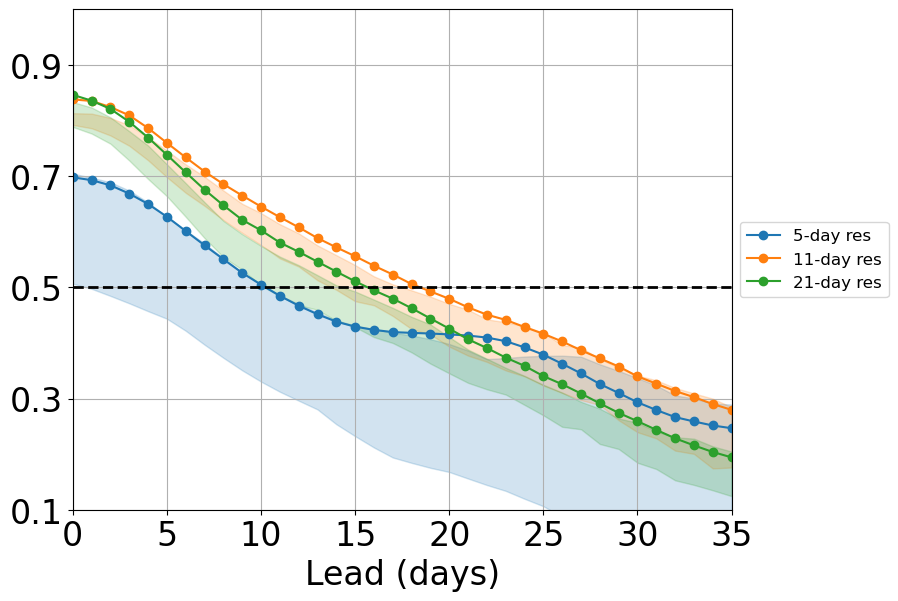

In [77]:
import matplotlib.cm as cm
cmap = cm.get_cmap('RdBu')
norm = plt.Normalize(vmin=3, vmax=31)

plt.rcParams['font.size']=24
fig, ax = plt.subplots(1,1, figsize=(8.5, 6.5))
for i, window_len in enumerate(np.asarray([5,11,15,21,25,31])):
    if window_len in (5,11,21):
        data = bccs_res_list_arr[i]
        bmin = np.min(data, axis=0)
        bmax = np.max(data, axis=0)
        line = plt.plot(np.arange(lead+1), bcc_res_list[i,:].T, 'o-', alpha=1, label=f'{window_len}-day res')[0]
        color = line.get_color()
        ax.fill_between(np.arange(lead+1), bmin, bmax, color=color, alpha=0.2)
plt.plot([0, 35], [0.5,0.5], '--', linewidth=2, color='black')
ax.set_xlim([0,35])
ax.set_xticks(np.arange(0,40,5))
ax.set_ylim([0.1,1.0])
ax.set_yticks(np.arange(0.1,1.0,0.2))
plt.xlabel('Lead (days)')
plt.grid()
plt.legend(fontsize=12, loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
import matplotlib.cm as cm
cmap = cm.get_cmap('RdBu')
norm = plt.Normalize(vmin=3, vmax=31)

plt.rcParams['font.size']=24
fig, ax = plt.subplots(1,1, figsize=(8.5, 6.5))
for i, window_len in enumerate(np.asarray([5,11,15,21,25,31])):
    # plt.plot(np.arange(lead+1), bcc_res_list[i,:].T, 'o-', alpha=1, color=cmap(norm(window_len)), label=f'{window_len}-day res')
    plt.plot(np.arange(lead+1), bcc_list[i,:].T, 'o-', alpha=1, label=f'{window_len}-day')
    # plt.plot(np.arange(lead+1), bcc_res_list[i,:].T, '--', alpha=1, label=f'{window_len}-day res')
plt.plot([0, 35], [0.5,0.5], '--', linewidth=2, color='black')
ax.set_xlim([0,35])
ax.set_xticks(np.arange(0,40,5))
ax.set_ylim([0.1,1.0])
ax.set_yticks(np.arange(0.1,1.0,0.2))
plt.xlabel('Lead (days)')
plt.grid()
plt.legend(fontsize=12, loc='center left', bbox_to_anchor=(1, 0.5))

/tmp/ipykernel_1264844/1467296713.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('RdBu')


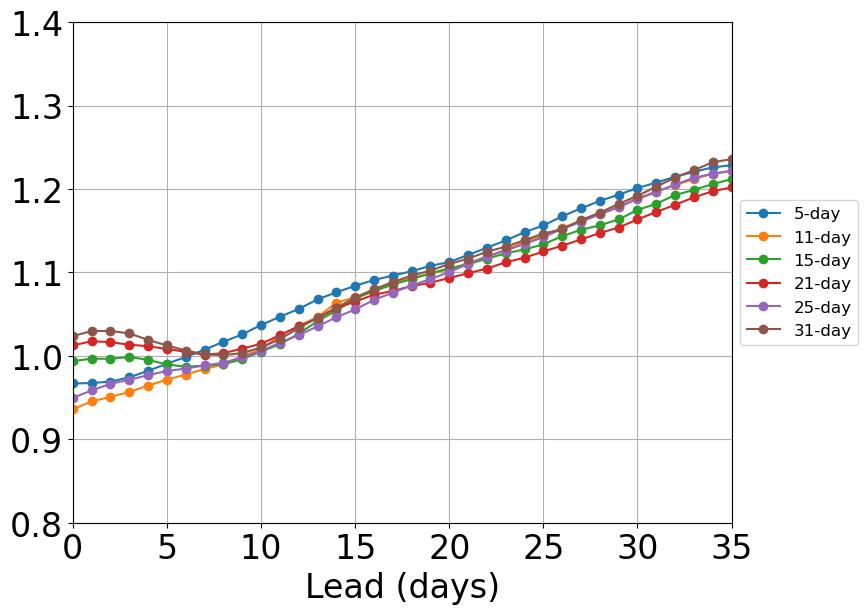

In [7]:
import matplotlib.cm as cm
cmap = cm.get_cmap('RdBu')
norm = plt.Normalize(vmin=3, vmax=31)

plt.rcParams['font.size']=24
fig, ax = plt.subplots(1,1, figsize=(8.5, 6.5))
for i, window_len in enumerate(np.asarray([5,11,15,21,25,31])):
    # plt.plot(np.arange(lead+1), bcc_res_list[i,:].T, 'o-', alpha=1, color=cmap(norm(window_len)), label=f'{window_len}-day res')
    plt.plot(np.arange(lead+1), rmse_list[i,:].T, 'o-', alpha=1, label=f'{window_len}-day')
    # plt.plot(np.arange(lead+1), bcc_res_list[i,:].T, '--', alpha=1, label=f'{window_len}-day res')
# plt.plot([0, 35], [0.5,0.5], '--', linewidth=2, color='black')
ax.set_xlim([0,35])
ax.set_xticks(np.arange(0,40,5))
ax.set_ylim([0.8,1.4])
# ax.set_yticks(np.arange(0.1,1.0,0.2))
plt.xlabel('Lead (days)')
plt.grid()
plt.legend(fontsize=12, loc='center left', bbox_to_anchor=(1, 0.5))

/tmp/ipykernel_1264844/1680570717.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('RdBu')


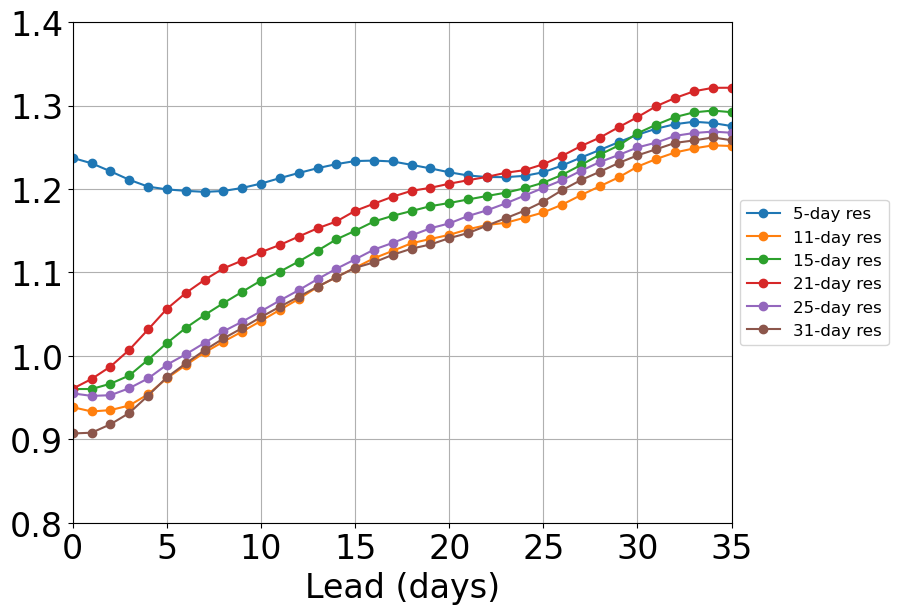

In [10]:
import matplotlib.cm as cm
cmap = cm.get_cmap('RdBu')
norm = plt.Normalize(vmin=3, vmax=31)

plt.rcParams['font.size']=24
fig, ax = plt.subplots(1,1, figsize=(8.5, 6.5))
for i, window_len in enumerate(np.asarray([5,11,15,21,25,31])):
    # plt.plot(np.arange(lead+1), bcc_res_list[i,:].T, 'o-', alpha=1, color=cmap(norm(window_len)), label=f'{window_len}-day res')
    # plt.plot(np.arange(lead+1), bcc_list[i,:].T, 'o-', alpha=1, label=f'{window_len}-day')
    plt.plot(np.arange(lead+1), rmse_res_list[i,:].T, 'o-', alpha=1, label=f'{window_len}-day res')
# plt.plot([0, 35], [0.5,0.5], '--', linewidth=2, color='black')
ax.set_xlim([0,35])
ax.set_xticks(np.arange(0,40,5))
ax.set_ylim([0.8,1.4])
# ax.set_yticks(np.arange(0.1,1.0,0.2))
plt.xlabel('Lead (days)')
plt.grid()
plt.legend(fontsize=12, loc='center left', bbox_to_anchor=(1, 0.5))

/tmp/ipykernel_2188542/2587654035.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('RdBu')


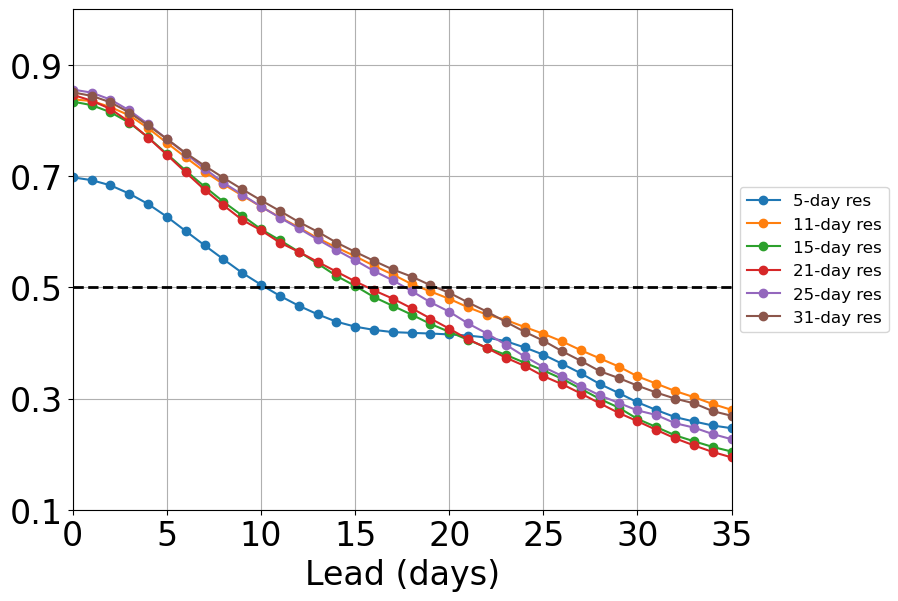

In [14]:
import matplotlib.cm as cm
cmap = cm.get_cmap('RdBu')
norm = plt.Normalize(vmin=3, vmax=31)

plt.rcParams['font.size']=24
fig, ax = plt.subplots(1,1, figsize=(8.5, 6.5))
for i, window_len in enumerate(np.asarray([5,11,15,21,25,31])):
    # plt.plot(np.arange(lead+1), bcc_res_list[i,:].T, 'o-', alpha=1, color=cmap(norm(window_len)), label=f'{window_len}-day res')
    # plt.plot(np.arange(lead+1), bcc_list[i,:].T, 'o-', alpha=1, label=f'{window_len}-day')
    plt.plot(np.arange(lead+1), bcc_res_list[i,:].T, 'o-', alpha=1, label=f'{window_len}-day res')
plt.plot([0, 35], [0.5,0.5], '--', linewidth=2, color='black')
ax.set_xlim([0,35])
ax.set_xticks(np.arange(0,40,5))
ax.set_ylim([0.1,1.0])
ax.set_yticks(np.arange(0.1,1.0,0.2))
plt.xlabel('Lead (days)')
plt.grid()
plt.legend(fontsize=12, loc='center left', bbox_to_anchor=(1, 0.5))

In [3]:
# find the lead closet to 0.5 
lead_ind = np.argmin(np.abs(bcc_list-0.5), axis=1)
lead_res_ind = np.argmin(np.abs(bcc_res_list-0.5), axis=1)

lead_ind 

array([25, 25, 22, 25, 22, 26, 22, 24, 21, 27, 24, 20, 23, 20, 21])

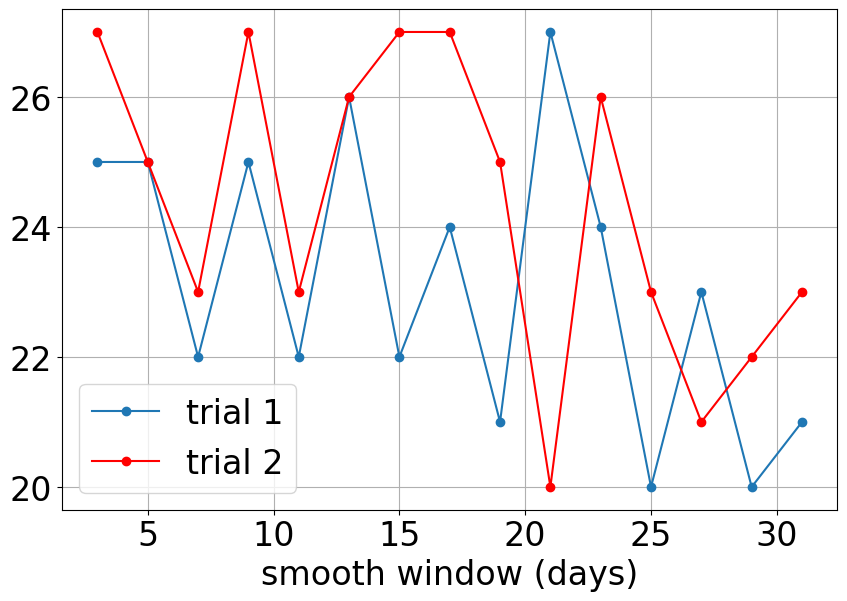

In [7]:
fig, ax = plt.subplots(1,1, figsize=(10, 6.5))
plt.rcParams['font.size']=24
plt.plot(np.arange(3,32,2), lead_ind, 'o-', alpha=1, color='tab:blue', label='trial 1')
plt.plot(np.arange(3,32,2), lead_res_ind, 'o-', alpha=1, color='red', label='trial 2')
# ax.set_ylim([0,35])
# ax.set_yticks(np.arange(0,40,5))
plt.xlabel('smooth window (days)')
plt.grid()
plt.legend()

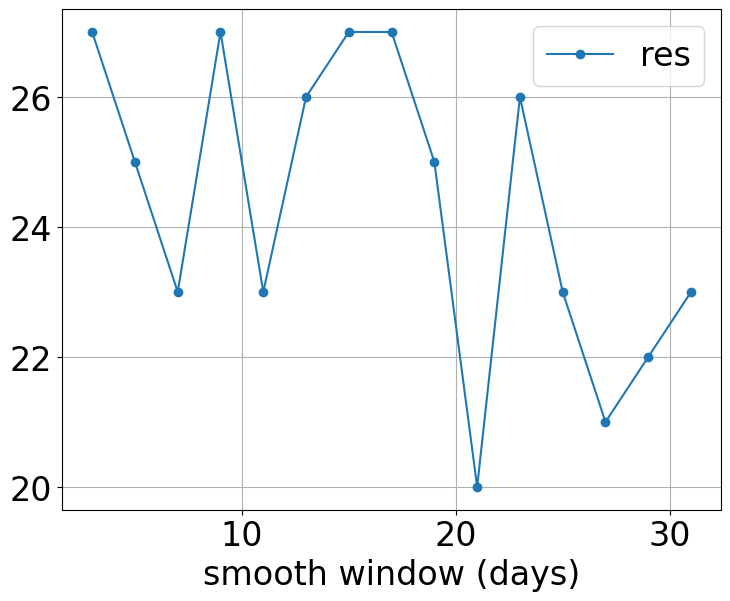

In [27]:
fig, ax = plt.subplots(1,1, figsize=(8.5, 6.5))
plt.rcParams['font.size']=24
plt.plot(np.arange(3,32,2), lead_ind, 'o-', alpha=1, color='tab:blue', label='res')
# ax.set_ylim([0,35])
# ax.set_yticks(np.arange(0,40,5))
plt.xlabel('smooth window (days)')
plt.grid()
plt.legend()

In [ ]:
# lat_range = 10
# lead = 35
# memory_last = 95
# window_len = 11
# residual = 'False'
# with open(f'./best_config_sm{window_len}_res{residual}.yaml', 'r') as file:
#     config = yaml.safe_load(file)

# output_path = config['prediction_save_path']

# fn_list = []

# import re

# for exp_num in range(1, 9):
#     fn = re.sub(r"exp\d+/", f"exp{exp_num}/", output_path)
#     fn_list.append(fn)

# bccens11false, _ = mjo.get_skill_all_leads_ensemble_mean(
#     fn_list=fn_list,
#     datesta='2016-01-01',
#     dateend='2021-12-31',
#     leadmjo=lead,
#     Fnmjo=config["data"]["target_path"]
# )

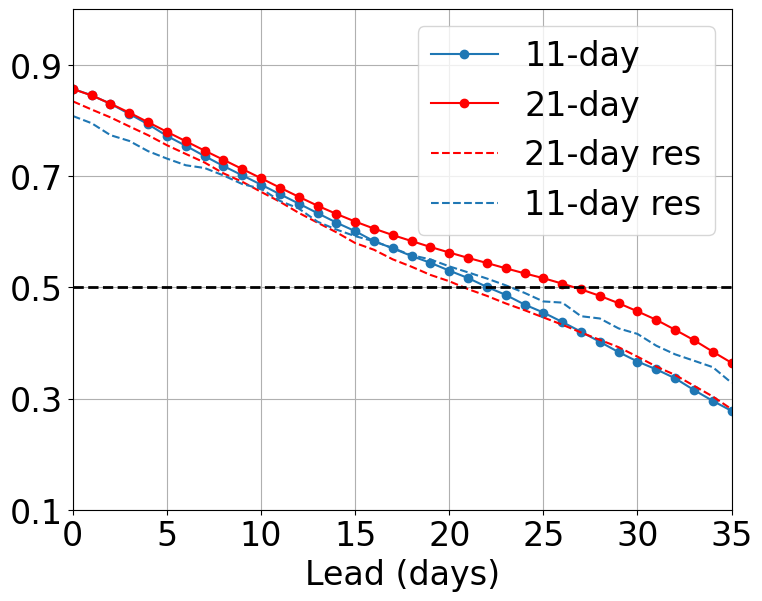

In [ ]:
# # plt.plot(np.arange(lead+1), bccs.T, linestyle='-', alpha=0.4, color='tab:gray')
# fig, ax = plt.subplots(1,1, figsize=(8.5, 6.5))
# plt.rcParams['font.size']=24
# plt.plot(np.arange(lead+1), bccens11false.T, 'o-', alpha=1, color='tab:blue', label='11-day')
# plt.plot(np.arange(lead+1), bccens21false.T, 'o-', alpha=1, color='red', label='21-day')
# plt.plot(np.arange(lead+1), bccens21true.T, '--', alpha=1, color='red', label='21-day res')
# plt.plot(np.arange(lead+1), bccens11true.T, '--', alpha=1, color='tab:blue', label='11-day res')
# plt.plot([0, 35], [0.5,0.5], '--', linewidth=2, color='black')
# ax.set_xlim([0,35])
# ax.set_xticks(np.arange(0,40,5))
# ax.set_ylim([0.1,1.0])
# ax.set_yticks(np.arange(0.1,1.0,0.2))
# plt.xlabel('Lead (days)')
# plt.grid()
# plt.legend()